# How to make nice publishable figure with matplotlib

First, let's see what the default parameters give us

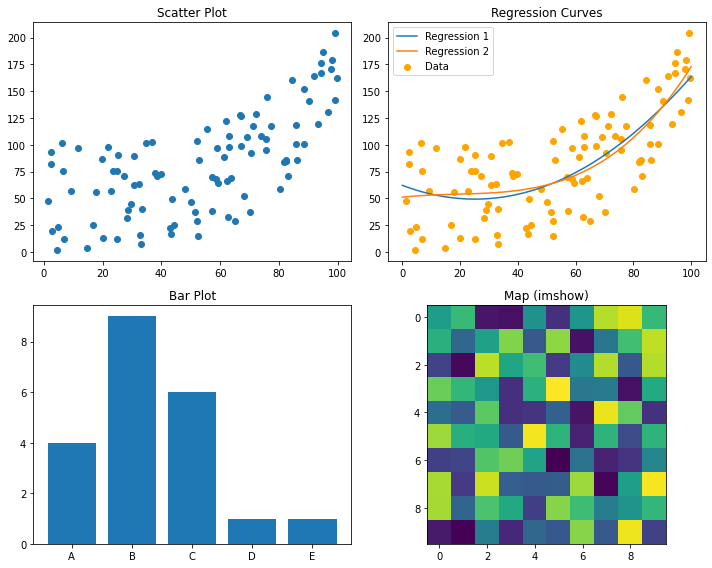

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# cleaning up matplotlib parameters to get back to default settings
plt.rcdefaults()

# Generate some sample data
x = np.random.rand(100)*100
y = np.exp(x/20) +  np.random.rand(100)*100
x_bar = ['A', 'B', 'C', 'D', 'E']
y_bar = np.random.randint(1, 10, size=len(x_bar))
x_map = np.random.rand(10, 10)

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Top-left subplot: scatter plot
axs[0, 0].scatter(x, y)
axs[0, 0].set_title('Scatter Plot')

# Top-right subplot: regression curves
x_reg = np.linspace(0, 100, 100)
y_reg1 = np.poly1d(np.polyfit(x, y, 2))(x_reg)
y_reg2 = np.poly1d(np.polyfit(x[::-1], y[::-1], 3))(x_reg)
axs[0, 1].plot(x_reg, y_reg1, label='Regression 1')
axs[0, 1].plot(x_reg, y_reg2, label='Regression 2')
axs[0, 1].scatter(x, y, c='orange', label='Data')

axs[0, 1].legend()
axs[0, 1].set_title('Regression Curves')

# Bottom-left subplot: bar plot
axs[1, 0].bar(x_bar, y_bar)
axs[1, 0].set_title('Bar Plot')

# Bottom-right subplot: imshow
axs[1, 1].imshow(x_map, cmap='viridis', interpolation='nearest')
axs[1, 1].set_title('Map (imshow)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


This is not optimal, so we are going to keep the same design but improve the plot to give the most relevant information, while making things simpler. Let's remove any useless objects, change the font style and size as well as the colors.

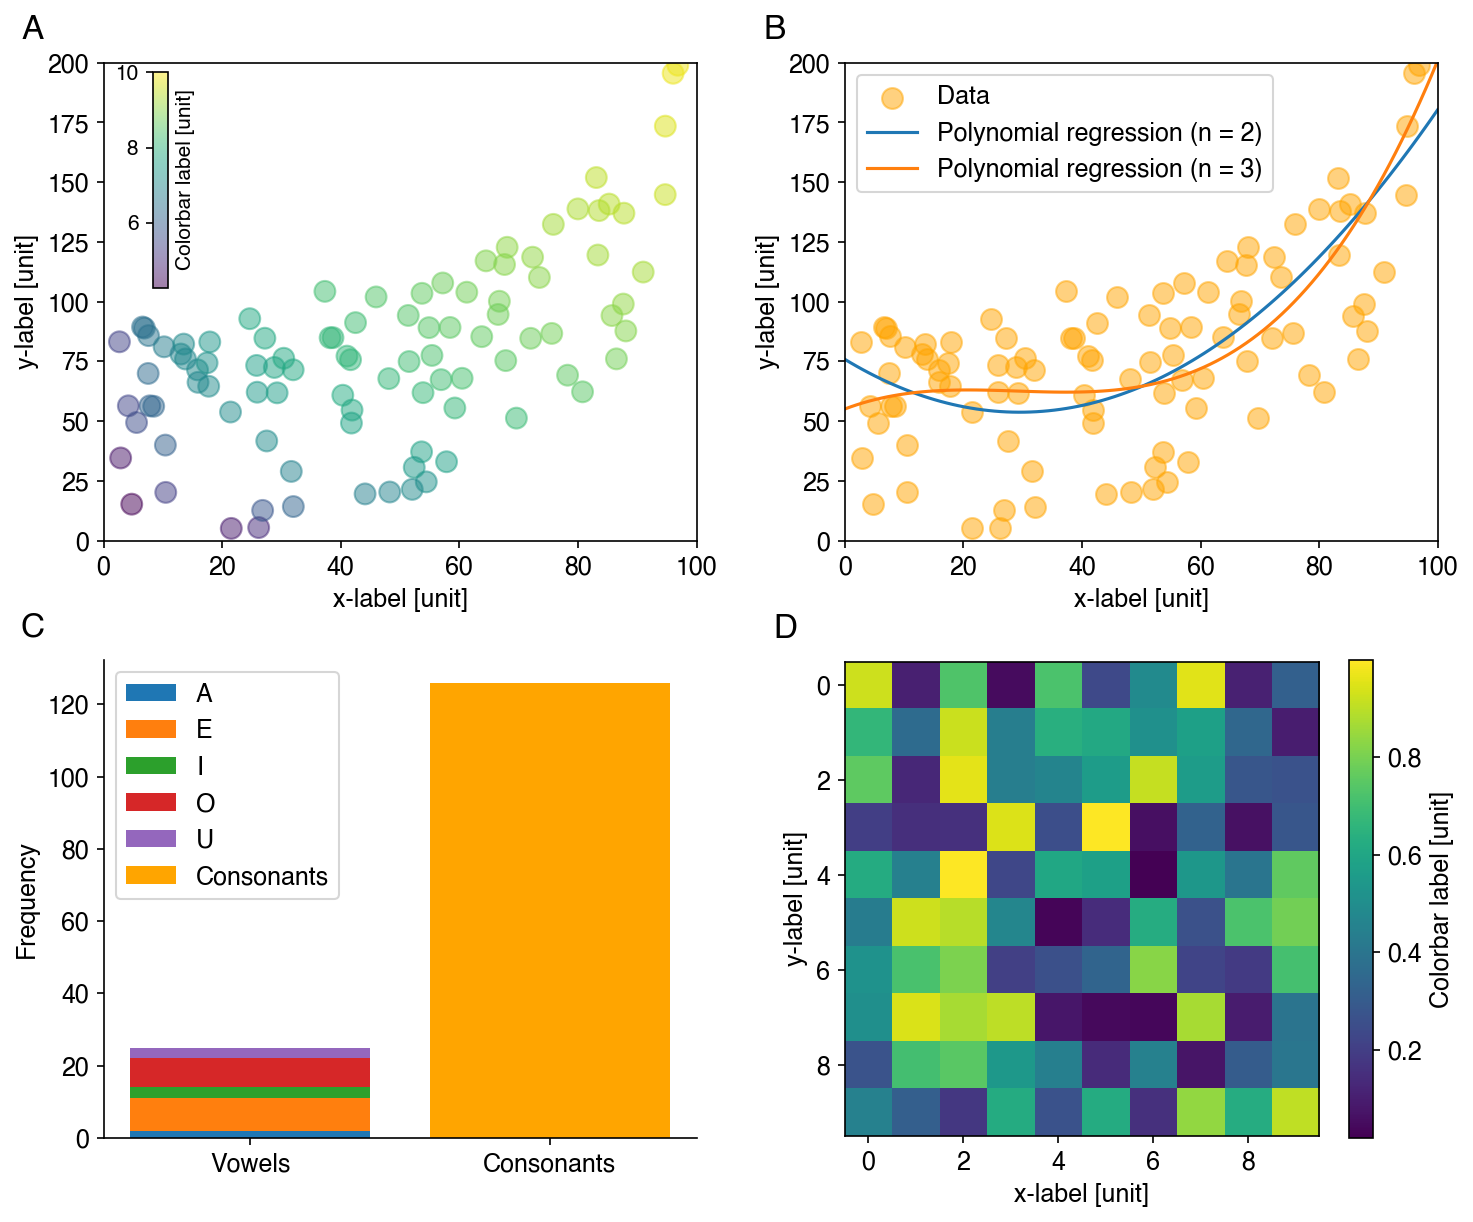

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.random.rand(100)*100
y = np.exp(x/20) +  np.random.rand(100)*100
x_map = np.random.rand(10, 10)

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

# Top-left subplot: scatter plot
axs[0, 0].scatter(x, y, alpha=0.5, s=100, c=np.log(y*x))

# Top-right subplot: regression curves
x_reg = np.linspace(0, 100, 100)
y_reg1 = np.poly1d(np.polyfit(x, y, 2))(x_reg)
y_reg2 = np.poly1d(np.polyfit(x[::-1], y[::-1], 3))(x_reg)
axs[0, 1].scatter(x, y, c='orange', label='Data', alpha=0.5, s=100)
axs[0, 1].plot(x_reg, y_reg1, label='Polynomial regression (n = 2)')
axs[0, 1].plot(x_reg, y_reg2, label='Polynomial regression (n = 3)')
axs[0, 1].legend()

# Bottom-left subplot: bar plot
# Merge vowels and consonants
x_vowels = ['A', 'E', 'I', 'O', 'U']
y_vowels = np.random.randint(1, 10, size=len(x_vowels))
x_consonants = ['B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'M',
                'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y', 'Z']
y_consonants = np.random.randint(1, 10, size=len(x_consonants))
# Plot stacked bar chart for vowels
bottom = 0
for vowel, count in zip(x_vowels, y_vowels):
    axs[1, 0].bar('Vowels', count, bottom=bottom, label=vowel)
    bottom += count
# Plot consonants as a separate bar
axs[1, 0].bar('Consonants', np.sum(y_consonants), color='orange', label='Consonants')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)

# Bottom-right subplot: imshow
im = axs[1, 1].imshow(x_map, cmap='viridis', interpolation='nearest')   # force nearest interpolation for pdf export
# Add colorbar
cbar = fig.colorbar(im, ax=axs[1, 1], orientation='vertical')
cbar.set_label('Colorbar label [unit]')
axs[1, 1].set_xlabel('x-label [unit]')
axs[1, 1].set_ylabel('y-label [unit]')

# Adjust layout
plt.tight_layout()

# Iterate over the top subplots only
for ax in axs[0]:
    ax.set_xlabel('x-label [unit]')
    ax.set_ylabel('y-label [unit]')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 200)
    ax.grid(False)

# Increase the space between subplots
plt.subplots_adjust(hspace=0.25, wspace=0.25)

# Add a colorbar into the top-left subplot, inside the plot
cax = plt.axes([0.11, 0.79, 0.01, 0.18])
cbar = plt.colorbar(axs[0, 0].collections[0], cax=cax, orientation='vertical')
cbar.set_label('Colorbar label [unit]') 
#change font size of colorbar
cbar.ax.tick_params(labelsize=10)
#change label font size of colorbar
cbar.ax.yaxis.label.set_size(10)
cbar.ax.yaxis.set_ticks_position('left')
cbar.ax.xaxis.set_ticks_position('top')

# Update font settings
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif', 'font.sans-serif': 'Helvetica'})

# Add letters to subplots
letter_labels = ['A', 'B', 'C', 'D']
for k, ax in enumerate(axs.flat):
    ax.text(-0.1, 1.1, letter_labels[k], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')

# Show plot
plt.show()


# saving in pdf format while controlling the imshow interpolation

fig.savefig('four_panels_figure.pdf', bbox_inches='tight')


Let's have a look at other kind of plots. This the default "

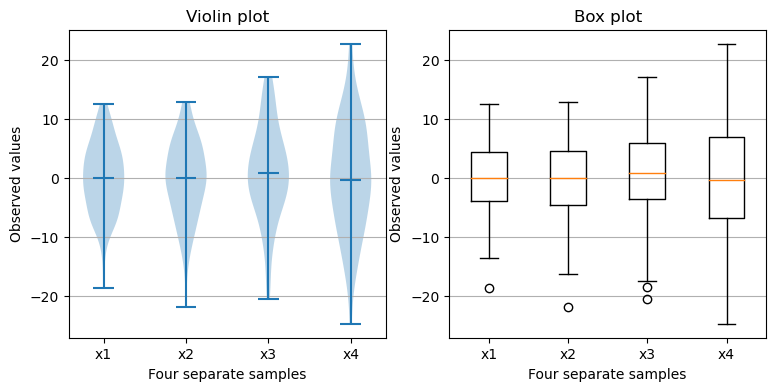

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

and now, following the same simplifications as above:

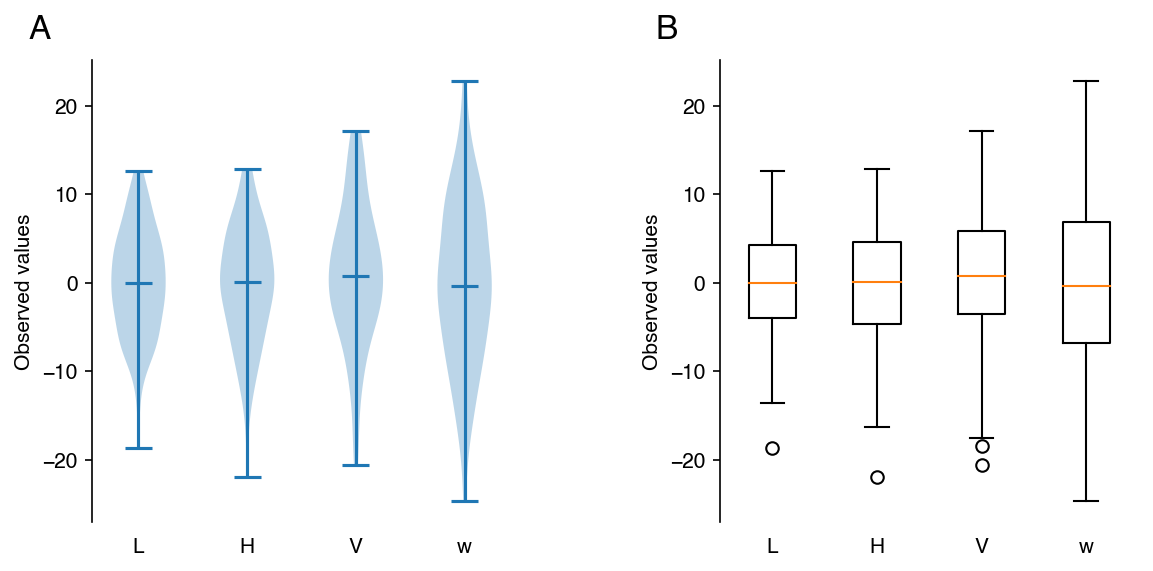

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4),dpi=150)

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)

#remove the box around the violin plot
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(True)
axs[0].spines['bottom'].set_visible(False)


axs[1].boxplot(all_data)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(True)
axs[1].spines['bottom'].set_visible(False)

#remove ticks on x-axis
axs[0].tick_params(axis='x', which='both', bottom=False, top=False)
axs[1].tick_params(axis='x', which='both', bottom=False, top=False)


# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(False)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['L', 'H', 'V', 'w']) 
     

    ax.set_ylabel('Observed values')

# Update font settings
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif', 'font.sans-serif': 'Helvetica'})

plt.subplots_adjust(hspace=0.1, wspace=0.5)
# Add letters to subplots
letter_labels = ['A', 'B', 'C', 'D']
for k, ax in enumerate(axs.flat):
    ax.text(-0.1, 1.1, letter_labels[k], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')

# Show plot
plt.show()

#save it into pdf file
fig.savefig('violin_box_plot.pdf', bbox_inches='tight')
